In [40]:
# Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import datetime

In [41]:
# Import data
file_dir = 'C://Users/KyleKato/OneDrive/ut_bootcamp/Portfolio/Project/data/'
df = pd.read_csv(f'{file_dir}chinese_debt_trap_world.csv')
lat_lng_df = pd.read_csv(f'{file_dir}lat_lng.csv')
lat_lng_df.head(5)


,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California


In [43]:
lat_lng_df = lat_lng_df.drop(columns=['usa_state', 'usa_state_code', 'usa_state_latitude', 'usa_state_longitude'])
lat_lng_df.head()

,country_code,latitude,longitude,country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [ ]:
# Renaming values so the rows can be grouped
# Renaming columns
df = df.rename(columns={'Expand All | Collapse All':'NAME'})
df['Country'] = df['Country'].str.replace('Congo, Democratic Republic of the', 'Congo, Republic of the')
df[['before','after']] = df.AMOUNT.str.split('.', expand=True)
df['after'] = df['after'].replace(np.nan, '')
df.head(2)

,NAME,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,before,after
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,$50M,CDB,Government,Transport,None Known,Angola,$50M,
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,$7.0B,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil,$7,0B


In [ ]:
# Replacing the .0 M/B with 0s
df['before'] = df['before'].str.replace('B', '000000').str.replace('M', '000').str.replace('$', '')
df['after'] = df['after'].str.replace('B', '00000').str.replace('M', '00')
df.head(2)

C:\Users\KyleKato\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,NAME,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,before,after
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,$50M,CDB,Government,Transport,None Known,Angola,50000,
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,$7.0B,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil,7,000000


In [ ]:
# Dropping the before and after columns
df['AMT'] = df['before'] + df['after']
df.drop(['before', 'after', 'AMOUNT'], axis=1, inplace=True)
df.head(2)

,NAME,YEAR,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,AMT
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,CDB,Government,Transport,None Known,Angola,50000
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil,7000000


In [ ]:
# Fomatting columns in AMT, BORROWER, and YEAR
df['AMT'] = df['AMT'].astype(int)
df['BORROWER'] = df['BORROWER'].astype(str)
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')
df.dtypes

NAME                                   object
YEAR                           datetime64[ns]
LENDER                                 object
BORROWER                               object
SECTOR                                 object
SENSITIVE TERRITORY OVERLAP            object
Country                                object
AMT                                     int32
dtype: object

In [ ]:
# Grouping by Country and summing them up
country_group = df.groupby(['Country']).sum()['AMT']

# Created a new dataframe for the grouped countries
country_df = pd.DataFrame({
                    'Amount': country_group
})

# Include country if it has more than 1,000,000 M
country_df = country_df[country_df['Amount'] > 1000000]
country_df.head(5)

,Amount
Country,
Angola,29640000
Argentina,17083000
Bangladesh,11089000
Belarus,6440000
Bolivia,3439000


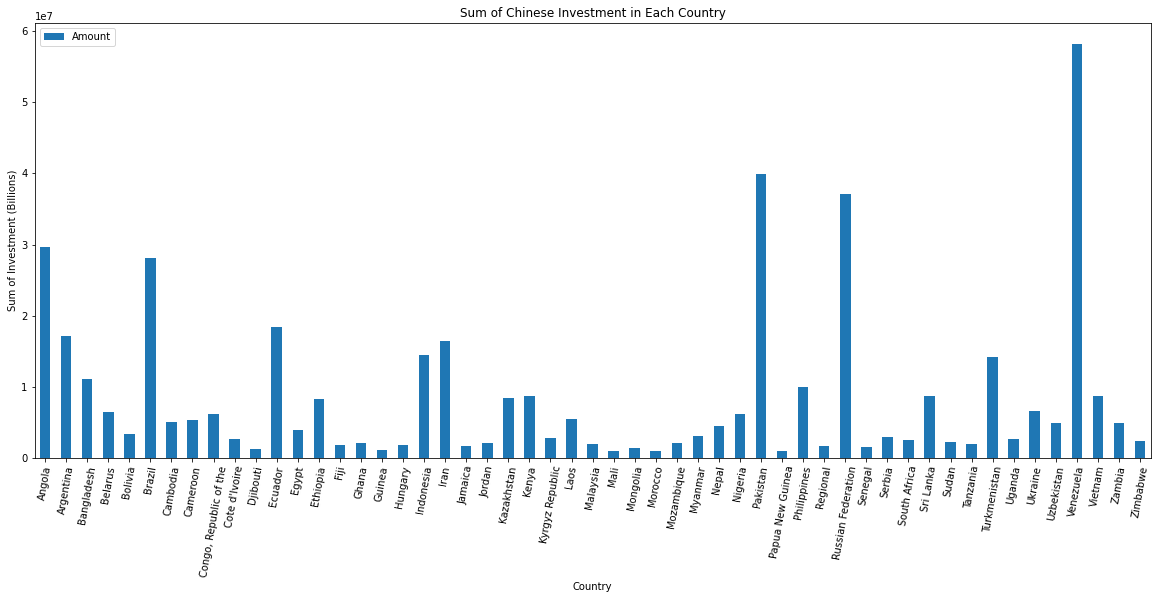

In [ ]:
# Plotting the bar graph
country_df.plot(kind='bar', figsize=(20,8))
plt.title('Sum of Chinese Investment in Each Country')
plt.xlabel('Country')
plt.ylabel('Sum of Investment (Billions)')
plt.xticks(rotation=80)
plt.show()

In [ ]:
#Check df
df.head()

,NAME,YEAR,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,AMT
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011-01-01,CDB,Government,Transport,None Known,Angola,50000
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009-01-01,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil,7000000
2,1000 housing project,2012-01-01,ExImBank,Government,Government,None Known,Suriname,47000
3,115kV Transmission Line and Substation from Ph...,2009-01-01,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia,475000
4,151 Multisector infrastructure projects,2016-01-01,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya,600000


In [ ]:
gov_df = df[df.BORROWER.isin(['Government'])]
gov_df

,NAME,YEAR,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,AMT
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011-01-01,CDB,Government,Transport,None Known,Angola,50000
2,1000 housing project,2012-01-01,ExImBank,Government,Government,None Known,Suriname,47000
5,20 Magnetic Resonance Imaging Equipment Purchase,2015-01-01,CDB,Government,Government,None Known,Kenya,27000
6,2015 Loop network in southwest regions,2015-01-01,ExImBank,Government,Power,None Known,Cambodia,90000
7,2017 Loop network in southwest regions and the...,2017-01-01,ExImBank,Government,Power,None Known,Cambodia,180000
...,...,...,...,...,...,...,...,...
853,Zalingei-El Geneinah Road Construction,2009-01-01,ExImBank,Government,Transport,None Known,Sudan,120000
854,Zanzibar Airport Terminal 2 Expansion,2010-01-01,ExImBank,Government,Transport,None Known,Tanzania,73000
855,Zemun-Borca bridge,2009-01-01,ExImBank,Government,Transport,None Known,Serbia,217000
856,Zongo II Hydropower Station,2011-01-01,ExImBank,Government,Power,None Known,"Congo, Republic of the",367000


In [ ]:
#def Remove(duplicate):
#    country_list = []
 #   for name in duplicate:
 #       if name not in country_list:
  ##          country_list.append(name)
  #  return country_list

#duplicate = df.Country.to_list()
#print(Remove(duplicate))

In [ ]:
# Top 5 countries 
top_5_df = df[df.Country.isin(['Venezuela', 'Pakistan', 'Russian Federation', 'Angola', 'Brazil'])]
top_5_df.head()

,NAME,YEAR,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,AMT
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011-01-01,CDB,Government,Transport,None Known,Angola,50000
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009-01-01,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil,7000000
12,3 Training Centers and Equipment for Angolan R...,2016-01-01,ExImBank,Government,Transport,None Known,Angola,39000
58,Angola's Railways Workshops Rehabilitation and...,2011-01-01,ExImBank,Government,Manufacturing,None Known,Angola,83000
71,Balloki Combined Cycle Power Plant,2015-01-01,ExImBank,NPPMCL,Power,None Known,Pakistan,785000


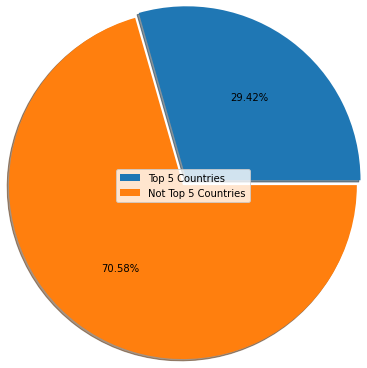

In [ ]:
# Gathering data and attributes for plot
top_5_sum = top_5_df.AMT.sum()
df_sum = df.AMT.sum()
list = [top_5_sum, df_sum]
list_names = ['Top 5 Countries', 'Not Top 5 Countries']
explode = [.07, 0]

# Plotting top 5 countries pie graph
plt.pie(list,
        autopct='%0.2f%%',
        shadow=True,
        radius=2,
        explode=explode)
plt.legend(list_names, loc='center')
plt.show()


In [ ]:
# Grouping top 5 countries
top_5 = top_5_df.groupby(['Country']).sum()['AMT']

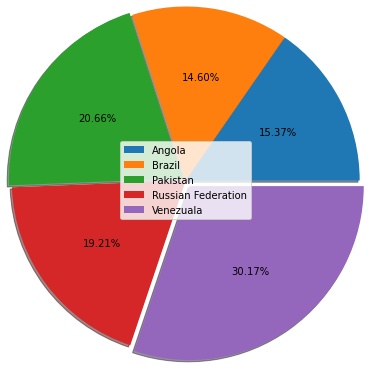

In [ ]:
top_5_country = ['Angola', 'Brazil', 'Pakistan', 'Russian Federation', 'Venezuala']
explode = [0,0,0.04,0,0.08]
plt.pie(top_5,
        explode=explode,
        autopct = "%0.2f%%",
        shadow=True,
        radius=2)
plt.legend(top_5_country, loc='center')
plt.show()

In [ ]:
df = df.drop(columns=['BORROWER', 'SECTOR', 'SENSITIVE TERRITORY OVERLAP', 'LENDER', 'NAME'])
df.head()

,YEAR,Country,AMT
0,2011-01-01,Angola,50000
1,2009-01-01,Brazil,7000000
2,2012-01-01,Suriname,47000
3,2009-01-01,Cambodia,475000
4,2016-01-01,Kenya,600000


In [ ]:
df_09 = df[df.YEAR.isin(['2009'])].sum()['AMT']
df_10 = df[df.YEAR.isin(['2010'])].sum()['AMT']
df_11 = df[df.YEAR.isin(['2011'])].sum()['AMT']
df_12 = df[df.YEAR.isin(['2012'])].sum()['AMT']
df_13 = df[df.YEAR.isin(['2013'])].sum()['AMT']
df_14 = df[df.YEAR.isin(['2014'])].sum()['AMT']
df_15 = df[df.YEAR.isin(['2015'])].sum()['AMT']
df_16 = df[df.YEAR.isin(['2016'])].sum()['AMT']
df_17 = df[df.YEAR.isin(['2017'])].sum()['AMT']
df_18 = df[df.YEAR.isin(['2018'])].sum()['AMT']
df_19 = df[df.YEAR.isin(['2019'])].sum()['AMT']

annual_sum_list = [df_09, df_10, df_11, df_12, df_13, df_14, df_15, df_16, df_17, df_18, df_19]
year_list = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018','2019',]

C:\Users\KyleKato\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
C:\Users\KyleKato\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
C:\Users\KyleKato\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel 

Text(0, 0.5, 'Billions Invested')

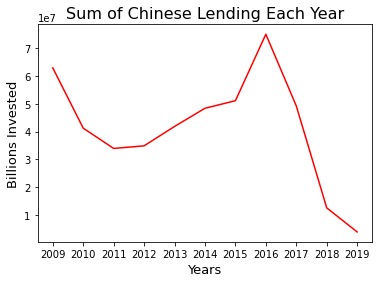

In [ ]:
plt.plot(year_list, annual_sum_list, color='red')
plt.title('Sum of Chinese Lending Each Year', fontsize=16)
plt.xlabel('Years', fontsize=13)
plt.ylabel("Billions Invested", fontsize=13)